## Laboratoria 6

In [3]:
import math
from scipy.integrate import romberg, quad
from scipy.stats import norm
from scipy.optimize import newton
from scipy.misc import derivative
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import sympy as sym

### Zadanie 1

In [4]:
f = lambda x: math.e**(-2*x)

#### 1 - metoda analityczna

$\int_{0}^{1}e^{-2x}dx = -(0.5)*e^{-2} + 2*e^0 = -(0.5)*e^{-2} + 2 \approx 0.4323$

#### 2 - metoda prostokątów

In [5]:
def simple_rectangle_int(f, a, b):
    return (b-a)*(f((a+b)/2))

simple_rectangle_int(f, 0, 1)

0.36787944117144233

#### 3 - prosty wzór trapezów

In [6]:
def simple_trapeze_int(f, a, b):
    return (0.5*(b-a)*(f(a) + f(b)))

simple_trapeze_int(f, 0, 1)

0.5676676416183064

#### 4 - prosty wzór Simpsona

In [7]:
def simple_simpson(f, a, b):
    return (1/6*(b-a)*(f(a) + 4*f((a+b)/2) + f(b)))

simple_simpson(f, 0, 1)

0.4344755079870637

#### 5 - złożony wzór trapezów

In [8]:
def complex_trapeze_int(f, a, b, n):
    result = 0
    x = np.linspace(a, b, n+1, endpoint=True)
    a = x[0]
    for i in range(len(x)-1):
        b = x[i+1]
        result += (0.5*(b-a)*(f(a)+f(b)))
        a = b
    return result

complex_trapeze_int(f, 0, 1, 10)

0.43377250641846693

#### 6 - złożony wzór Simpsona

In [9]:
def complex_simpson(f, a, b, n):
    result = 0
    x = np.linspace(a, b, n+1, endpoint=True)
    a = x[0]
    for i in range(len(x)-1):
        b =x[i+1]
        result += 1/6*(b-a)*(f(a) + 4*f((a+b)/2) + f(b))
        a = b
    return result

complex_simpson(f, 0, 1, 10)

0.43233259828070303

#### 7 - metoda Romberga

In [10]:
romberg(f, 0, 1, tol=10**-6)

0.43233235838943557

#### 8 - scipy.integrate.quad

In [11]:
quad(f, 0, 1)

(0.4323323583816936, 4.79985338565851e-15)

Wyniki otrzymane korzystając z metod 6-8 są podobne do siebie i najbardziej zbliżone do wartości obliczonej analitycznie. Stosunkowo blisko wartości analitycznje są rezultaty metod 4 i 5 natomiast wyniki prostego wzoru trapezów i metody prostokątów są niedokładne.

### Zadanie 2

In [12]:
f2 = lambda t: 1/(math.sqrt(2*math.pi))*math.e**(-(t**2)/2)

ref = newton(lambda x: norm.cdf(x) - 0.95, 0.5, tol=10**-5)

trapeze = newton(lambda x: complex_trapeze_int(f2, 0, x, 10) - 0.45, 0.5, fprime=f2, tol=10**-5) #jako pochodną podajemy funkcję pod całką aby użyć metody stycznych a nie siecznych

simpson = newton(lambda x: complex_simpson(f2, 0, x, 10) - 0.45, 0.5, fprime=f2, tol=10**-5) #jako pochodną podajemy funkcję pod całką aby użyć metody stycznych a nie siecznych
print("""Wartość referencyjna: {}
Wartość ze wzoru trapezów: {}
Wartość ze wzoru Simpsona: {}""".format(ref, trapeze, simpson))


Wartość referencyjna: 1.6448536265523015
Wartość ze wzoru trapezów: 1.6485764168024826
Wartość ze wzoru Simpsona: 1.6448535054543454


Wartości obliczone przy użyciu złożonego wzoru trapezów i złożonego wzoru Simpsona są bardzo bliskie wartości referencyjnej.

### Zadanie 3

In [75]:
times = [0., 0.5, 1., 2., 3., 4.]
accs = [-4.5, -4.5, -2.3, -1., -0.5, 0.]

acc_function = interpolate.interp1d(times, accs)

vel_function = lambda t: quad(acc_function, 0, t)[0]
v0 = vel_function(4) #tyle ogólnie zwolnił - w 4s jego prędkość wyniosła zero więc należy to dodać jako prędkość początkową
vel_function = lambda t: -v0 + quad(acc_function, 0, t)[0]
vel_function(0)

dist_function = lambda t: quad(vel_function, 0, t)[0]
s = dist_function(4)
v_avg = dist_function(0.5)/0.5

print("""
Droga hamowania pojazdu wyniosła: {} m
Średnia prędkość samochodu w czasie t=[0,0.5]: {} m/s""".format(s, v_avg))


Droga hamowania pojazdu wyniosła: 6.8249999822308585 m
Średnia prędkość samochodu w czasie t=[0,0.5]: 5.4750000000000005 m/s


### Zadanie 4

In [139]:
#f4 = lambda x, A, T: A*(math.sin(2*math.pi*(x/T)))

A = 0.1
T = 0.2
lenght = 4.8
#f4 = lambda x: A*math.sin(2*math.pi*(x/T))
#f4_derivative = lambda x: 2*math.pi/T*A*math.cos(2*math.pi*(x/T))
int_function = lambda x: math.sqrt(1 + (2*math.pi/T*A*math.cos(2*math.pi*(x/T)))**2) 

trapeze = complex_trapeze_int(int_function, 0, lenght, 10)
simpson = complex_simpson(int_function, 0, lenght, 10)
romberg_ = romberg(int_function, 0, lenght, tol=10**-6)

print("""Wartość z metody Romberga: {}
Wartość ze wzoru trapezów: {}
Wartość ze wzoru Simpsona: {}""".format(romberg_, trapeze, simpson))





Wartość z metody Romberga: 15.825159885482952
Wartość ze wzoru trapezów: 11.084984534623379
Wartość ze wzoru Simpsona: 11.084984534623391


Wynik otrzymany używając metody Romberga jest znacznie wyższy niż wyniki uzyskane ze wzorów trapezów oraz Simpsona. Wynik uzyskany przy użyciu kalkulatora wolfram alpha wynosi około 11.06 co sugeruje, że w tym wypadku metoda Romberga okazała się bardzo niedokładna.

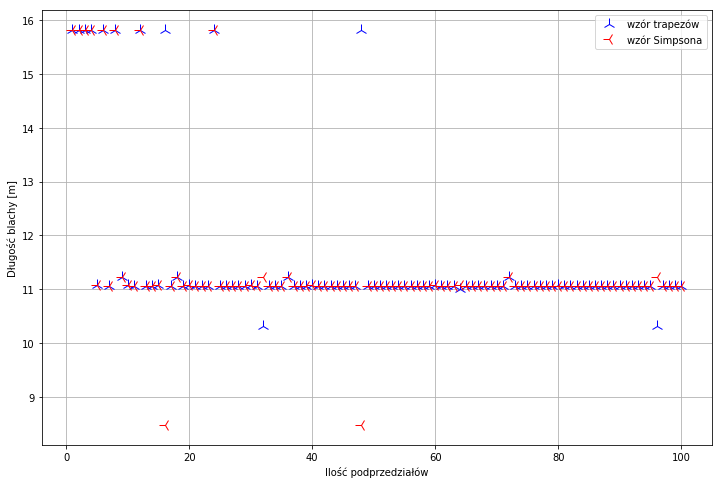

In [159]:
trapeze_results = [complex_trapeze_int(int_function, 0, lenght, i) for i in range(1, 101)]
simpson_results = [complex_simpson(int_function, 0, lenght, i) for i in range(1,101)]

plt.figure(figsize=(12,8))
plt.plot([i for i in range(1,101)], trapeze_results, 'b2', markersize=12,label="wzór trapezów" )
plt.plot([i for i in range(1,101)], simpson_results, 'r3', markersize=12,label="wzór Simpsona")
plt.legend()
plt.xlabel("Ilość podprzedziałów")
plt.ylabel("Długość blachy [m]")
plt.grid()

Dla obu wzorów, w większości przypadków otrzymujemy ten sam, bliski poprawnemu, wynik. Pojawiają się jednak rozbieżności, tym częściej, im mniej podprzedziałów użyliśmy. Dla wzoru trapezów wydają się one mniejsze niż dla wzoru Simpsona. 